In [1]:
# Importing packages ####
library(tidyverse) # metapackage with lots of helpful functions
library(readr)
library(dplyr)
library(psych)
library(ggplot2)
library(lubridate)
library(magrittr)
library(corrplot)
library(ggfortify)
library(MASS)
library(caret)
#list.files(path = "../input")

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──

✔ ggplot2 3.2.1.9000     ✔ purrr   0.3.3     
✔ tibble  2.1.3          ✔ dplyr   0.8.3     
✔ tidyr   1.0.0          ✔ stringr 1.4.0     
✔ readr   1.3.1          ✔ forcats 0.4.0     

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘psych’


The following objects are masked from ‘package:ggplot2’:

    %+%, alpha



Attaching package: ‘lubridate’


The following object is masked from ‘package:base’:

    date



Attaching package: ‘magrittr’


The following object is masked from ‘package:purrr’:

    set_names


The following object is masked from ‘package:tidyr’:

    extract


corrplot 0.84 loaded


Attaching package: ‘MASS’


The following object is masked from ‘package:dplyr’:

    select


Loading required package: lattice


Attaching package: ‘caret’


The following obj

In [2]:
#load data
a="../input/beijing-multisite-airquality-data-set/PRSA_Data_Aotizhongxin_20130301-20170228.csv"
b="../input/beijing-multisite-airquality-data-set/PRSA_Data_Changping_20130301-20170228.csv"
c="../input/beijing-multisite-airquality-data-set/PRSA_Data_Dingling_20130301-20170228.csv"
d="../input/beijing-multisite-airquality-data-set/PRSA_Data_Dongsi_20130301-20170228.csv"
e="../input/beijing-multisite-airquality-data-set/PRSA_Data_Guanyuan_20130301-20170228.csv"
f="../input/beijing-multisite-airquality-data-set/PRSA_Data_Gucheng_20130301-20170228.csv"
g="../input/beijing-multisite-airquality-data-set/PRSA_Data_Huairou_20130301-20170228.csv"
h="../input/beijing-multisite-airquality-data-set/PRSA_Data_Shunyi_20130301-20170228.csv"
i="../input/beijing-multisite-airquality-data-set/PRSA_Data_Tiantan_20130301-20170228.csv"
j="../input/beijing-multisite-airquality-data-set/PRSA_Data_Wanliu_20130301-20170228.csv"
k="../input/beijing-multisite-airquality-data-set/PRSA_Data_Wanshouxigong_20130301-20170228.csv"

#Read Data
a <- read_csv(a)
b <- read_csv(b)
c <- read_csv(c)
d <- read_csv(d)
e <- read_csv(e)
f <- read_csv(f)
g <- read_csv(g)
h <- read_csv(h)
i <- read_csv(i)
j <- read_csv(j)
k <- read_csv(k)

Parsed with column specification:
cols(
  No = col_double(),
  year = col_double(),
  month = col_double(),
  day = col_double(),
  hour = col_double(),
  PM2.5 = col_double(),
  PM10 = col_double(),
  SO2 = col_double(),
  NO2 = col_double(),
  CO = col_double(),
  O3 = col_double(),
  TEMP = col_double(),
  PRES = col_double(),
  DEWP = col_double(),
  RAIN = col_double(),
  wd = col_character(),
  WSPM = col_double(),
  station = col_character()
)

Parsed with column specification:
cols(
  No = col_double(),
  year = col_double(),
  month = col_double(),
  day = col_double(),
  hour = col_double(),
  PM2.5 = col_double(),
  PM10 = col_double(),
  SO2 = col_double(),
  NO2 = col_double(),
  CO = col_double(),
  O3 = col_double(),
  TEMP = col_double(),
  PRES = col_double(),
  DEWP = col_double(),
  RAIN = col_double(),
  wd = col_character(),
  WSPM = col_double(),
  station = col_character()
)

Parsed with column specification:
cols(
  No = col_double(),
  year = col_double(),
  mo

In [3]:
#Merge Data
commcol <- intersect(colnames(a), colnames(b))
pr <- rbind(
  a[commcol], b[commcol], c[commcol], d[commcol], e[commcol], f[commcol], g[commcol],
    h[commcol], i[commcol], j[commcol], k[commcol]
)
head(pr,  row = 20)

No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<chr>
1,2013,3,1,0,4,4,4,7,300,77,-0.7,1023.0,-18.8,0,NNW,4.4,Aotizhongxin
2,2013,3,1,1,8,8,4,7,300,77,-1.1,1023.2,-18.2,0,N,4.7,Aotizhongxin
3,2013,3,1,2,7,7,5,10,300,73,-1.1,1023.5,-18.2,0,NNW,5.6,Aotizhongxin
4,2013,3,1,3,6,6,11,11,300,72,-1.4,1024.5,-19.4,0,NW,3.1,Aotizhongxin
5,2013,3,1,4,3,3,12,12,300,72,-2.0,1025.2,-19.5,0,N,2.0,Aotizhongxin
6,2013,3,1,5,5,5,18,18,400,66,-2.2,1025.6,-19.6,0,N,3.7,Aotizhongxin


In [4]:
#Choose numerical data
pr <- as.data.frame(pr)
pr1 <- pr %>% select_if(is.numeric)


In [5]:
library(imputeTS)
Missing <- pr %>% summarise_all(~(sum(is.na(.))/n()))
Missing <- gather(Missing, key = "variables", value = "percent_missing")

pr$`PM2.5` = na_mean(pr$`PM2.5`)
pr$PM10 = na_mean(pr$PM10)
Missing

Registered S3 method overwritten by 'xts':
  method     from
  as.zoo.xts zoo 

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 

Registered S3 methods overwritten by 'forecast':
  method                 from     
  autoplot.Arima         ggfortify
  autoplot.acf           ggfortify
  autoplot.ar            ggfortify
  autoplot.bats          ggfortify
  autoplot.decomposed.ts ggfortify
  autoplot.ets           ggfortify
  autoplot.forecast      ggfortify
  autoplot.stl           ggfortify
  autoplot.ts            ggfortify
  fitted.ar              ggfortify
  fitted.fracdiff        fracdiff 
  fortify.ts             ggfortify
  residuals.ar           ggfortify
  residuals.fracdiff     fracdiff 



variables,percent_missing
<chr>,<dbl>
No,0.0000000000
year,0.0000000000
month,0.0000000000
day,0.0000000000
hour,0.0000000000
PM2.5,0.0210290793
PM10,0.0155793043
SO2,0.0222320743
NO2,0.0296185676


In [6]:
abc <- c('year','month','day','hour', 'PM2.5', 'PM10', 'TEMP', 'PRES', 'DEWP')

pr2 <- pr1[abc]

head(pr2)

#PCA
p2 <- principal(pr2, nfactors = 3, covar = TRUE)
print(p2)

,year,month,day,hour,PM2.5,PM10,TEMP,PRES,DEWP
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2013,3,1,0,4,4,-0.7,1023.0,-18.8
2,2013,3,1,1,8,8,-1.1,1023.2,-18.2
3,2013,3,1,2,7,7,-1.1,1023.5,-18.2
4,2013,3,1,3,6,6,-1.4,1024.5,-19.4
5,2013,3,1,4,3,3,-2.0,1025.2,-19.5
6,2013,3,1,5,5,5,-2.2,1025.6,-19.6


Principal Components Analysis
Call: principal(r = pr2, nfactors = 3, covar = TRUE)
Unstandardized loadings (pattern matrix) based upon covariance matrix
        RC1   RC2   RC3      h2     u2     H2      U2
year  -0.03 -0.07 -0.20 4.7e-02  1.338 0.0343 9.7e-01
month  0.00 -0.15  0.66 4.6e-01 11.432 0.0388 9.6e-01
day    0.05  0.47  0.02 2.3e-01 77.216 0.0029 1.0e+00
hour   0.12  0.73  0.27 6.2e-01 47.299 0.0129 9.9e-01
PM2.5 80.11 -4.54  3.12 6.4e+03  0.118 1.0000 1.8e-05
PM10  83.01 38.01 -4.93 8.4e+03  0.055 1.0000 6.6e-06
TEMP  -1.72  2.61 10.39 1.2e+02 12.942 0.9010 9.9e-02
PRES   0.39 -2.55 -9.00 8.8e+01 22.140 0.7983 2.0e-01
DEWP   1.20  1.46 13.07 1.7e+02 15.739 0.9173 8.3e-02

                           RC1     RC2    RC3
SS loadings           13311.47 1481.86 394.60
Proportion Var            0.87    0.10   0.03
Cumulative Var            0.87    0.96   0.99
Proportion Explained      0.88    0.10   0.03
Cumulative Proportion     0.88    0.97   1.00

 Standardized loadings (patte

In [7]:
#PCA
p1 <- principal(pr1, nfactors = 3, covar = TRUE)
print(p1)

Warning message in pchisq(df = result$dof, ncp = x, q = result$STATISTIC):
“pnchisq(x=5.65616e+06, ..): not converged in 1000000 iter.”
Warning message in pchisq(df = result$dof, ncp = x, q = result$STATISTIC):
“pnchisq(x=5.65616e+06, ..): not converged in 1000000 iter.”
Warning message in pchisq(df = result$dof, ncp = x, q = result$STATISTIC):
“pnchisq(x=5.65616e+06, ..): not converged in 1000000 iter.”
Warning message in pchisq(df = result$dof, ncp = x, q = result$STATISTIC):
“pnchisq(x=5.65616e+06, ..): not converged in 1000000 iter.”
Warning message in pchisq(df = result$dof, ncp = x, q = result$STATISTIC):
“pnchisq(x=5.65616e+06, ..): not converged in 1000000 iter.”
Warning message in pchisq(df = result$dof, ncp = x, q = result$STATISTIC):
“pnchisq(x=5.65616e+06, ..): not converged in 1000000 iter.”
Warning message in pchisq(df = result$dof, ncp = x, q = result$STATISTIC):
“pnchisq(x=5.65616e+06, ..): not converged in 1000000 iter.”
Warning message in pchisq(df = result$dof, ncp =

Principal Components Analysis
Call: principal(r = pr1, nfactors = 3, covar = TRUE)
Unstandardized loadings (pattern matrix) based upon covariance matrix
          RC1     RC3     RC2      h2      u2     H2      U2
No    9963.79 1560.67 -862.79 1.0e+08 1.2e-04 1.0000 1.1e-12
year     1.13    0.15   -0.10 1.3e+00 8.3e-02 0.9404 6.0e-02
month    0.10    0.33    0.01 1.2e-01 1.2e+01 0.0098 9.9e-01
day      0.22   -0.40    0.03 2.1e-01 7.7e+01 0.0027 1.0e+00
hour     0.17   -0.91    0.22 9.0e-01 4.7e+01 0.0188 9.8e-01
PM2.5    6.36  -11.67   75.63 5.9e+03 5.5e+02 0.9144 8.6e-02
PM10     7.57  -28.30   84.61 8.0e+03 3.4e+02 0.9591 4.1e-02
SO2     -4.30    2.41   11.61 1.6e+02 3.0e+02 0.3481 6.5e-01
NO2     -0.20    4.83   25.14 6.6e+02 5.7e+02 0.5370 4.6e-01
CO      32.78  506.30 1033.84 1.3e+06 3.7e+00 1.0000 2.8e-06
O3      -0.20  -22.68   -8.63 5.9e+02 2.6e+03 0.1845 8.2e-01
TEMP    -0.86   -4.64   -1.88 2.6e+01 1.0e+02 0.1970 8.0e-01
PRES     1.48    3.68    0.38 1.6e+01 9.4e+01 0.1445 8

In [8]:
pc <- cor(pr1, use = "complete.obs")
pc <- as.data.frame(pc)


In [9]:
plot.psych(pr)

In [10]:
###LDA Analysis
LDA_A <- lda(pr$`PM2.5` ~ pr$station + pr$year + pr$CO)
print(LDA_A)

Call:
lda(pr$PM2.5 ~ pr$station + pr$year + pr$CO)

Prior probabilities of groups:
               2                3                4              4.3 
    2.730681e-05     2.080779e-02     8.585261e-03     5.461362e-06 
             4.4              4.6                5                6 
    2.730681e-06     2.730681e-06     1.058685e-02     1.360698e-02 
               7              7.2              7.9                8 
    1.511705e-02     2.730681e-06     2.730681e-06     1.662985e-02 
             8.4              8.5              8.6              8.8 
    2.730681e-06     5.461362e-06     2.730681e-06     2.730681e-06 
               9              9.6               10             10.7 
    1.675273e-02     8.192043e-06     1.723060e-02     2.730681e-06 
              11             11.2             11.5               12 
    1.657797e-02     2.730681e-06     2.730681e-06     1.628032e-02 
            12.5             12.6             12.7               13 
    2.730681e-06    

In [11]:
#Regression of non numeric Date to predict pm2.5
m3 <- lm(pr$PM2.5 ~ pr$year + pr$TEMP + pr$SO2 + pr$O3 + pr$WSPM)
summary(m3)

m4 <- lm(pr$PM10 ~ pr$year + pr$TEMP + pr$SO2 + pr$O3 + pr$WSPM)
summary(m4)


Call:
lm(formula = pr$PM2.5 ~ pr$year + pr$TEMP + pr$SO2 + pr$O3 + 
    pr$WSPM)

Residuals:
    Min      1Q  Median      3Q     Max 
-928.13  -42.26  -17.10   21.80  626.18 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -1.218e+04  2.006e+02  -60.74   <2e-16 ***
pr$year      6.083e+00  9.954e-02   61.11   <2e-16 ***
pr$TEMP      5.358e-01  1.330e-02   40.28   <2e-16 ***
pr$SO2       1.811e+00  5.722e-03  316.58   <2e-16 ***
pr$O3       -6.706e-02  2.634e-03  -25.46   <2e-16 ***
pr$WSPM     -1.381e+01  9.619e-02 -143.60   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 67.75 on 369420 degrees of freedom
  (16278 observations deleted due to missingness)
Multiple R-squared:  0.2818,	Adjusted R-squared:  0.2818 
F-statistic: 2.899e+04 on 5 and 369420 DF,  p-value: < 2.2e-16



Call:
lm(formula = pr$PM10 ~ pr$year + pr$TEMP + pr$SO2 + pr$O3 + pr$WSPM)

Residuals:
     Min       1Q   Median       3Q      Max 
-1078.60   -52.01   -18.84    31.01   979.88 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -1.154e+04  2.366e+02  -48.78   <2e-16 ***
pr$year      5.770e+00  1.174e-01   49.14   <2e-16 ***
pr$TEMP      8.918e-01  1.569e-02   56.84   <2e-16 ***
pr$SO2       2.058e+00  6.749e-03  304.87   <2e-16 ***
pr$O3       -9.247e-02  3.107e-03  -29.76   <2e-16 ***
pr$WSPM     -9.099e+00  1.135e-01  -80.20   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 79.92 on 369420 degrees of freedom
  (16278 observations deleted due to missingness)
Multiple R-squared:  0.234,	Adjusted R-squared:  0.234 
F-statistic: 2.257e+04 on 5 and 369420 DF,  p-value: < 2.2e-16


In [12]:
data_ctrl <- trainControl(method = "cv", number = 5)
m5 <- train(PM2.5 ~ year + TEMP + SO2 + O3,   # model to fit
                     data = pr,                        
                     trControl = data_ctrl,              # folds
                     method = "lm",                      # specifying regression model
                     na.action = na.pass)                # pass missing data to model - some models will handle this

In [13]:
m5
m5$finalModel

Linear Regression 

385704 samples
     4 predictor

No pre-processing
Resampling: Cross-Validated (5 fold) 
Summary of sample sizes: 308563, 308562, 308563, 308564, 308564 
Resampling results:

  RMSE      Rsquared   MAE     
  69.61909  0.2417101  48.99199

Tuning parameter 'intercept' was held constant at a value of TRUE


Call:
lm(formula = .outcome ~ ., data = dat)

Coefficients:
(Intercept)         year         TEMP          SO2           O3  
 -1.112e+04    5.542e+00    9.232e-01    1.901e+00   -1.981e-01  


In [14]:
library(car)
outlierTest(m5)

Loading required package: carData


Attaching package: ‘car’


The following object is masked from ‘package:psych’:

    logit


The following object is masked from ‘package:dplyr’:

    recode


The following object is masked from ‘package:purrr’:

    some




ERROR: Error in UseMethod("outlierTest"): no applicable method for 'outlierTest' applied to an object of class "c('train', 'train.formula')"


In [15]:
m6 <- train(PM10 ~ year + TEMP + SO2 + O3,   # model to fit
                     data = pr,                        
                     trControl = data_ctrl,              # folds
                     method = "lm",                      # specifying regression model
                     na.action = na.pass)                # pass missing data to model - some models will handle this

In [16]:
m6
m6$finalModel

Linear Regression 

385704 samples
     4 predictor

No pre-processing
Resampling: Cross-Validated (5 fold) 
Summary of sample sizes: 308564, 308563, 308563, 308563, 308563 
Resampling results:

  RMSE      Rsquared   MAE     
  80.61422  0.2206937  57.35692

Tuning parameter 'intercept' was held constant at a value of TRUE


Call:
lm(formula = .outcome ~ ., data = dat)

Coefficients:
(Intercept)         year         TEMP          SO2           O3  
 -1.084e+04    5.413e+00    1.147e+00    2.116e+00   -1.788e-01  


Warning message:
“Use of `pr$station` is discouraged. Use `station` instead.”
Warning message:
“Use of `pr$PM2.5` is discouraged. Use `PM2.5` instead.”
Warning message:
“Use of `pr$station` is discouraged. Use `station` instead.”
Warning message:
“Use of `pr$PM10` is discouraged. Use `PM10` instead.”


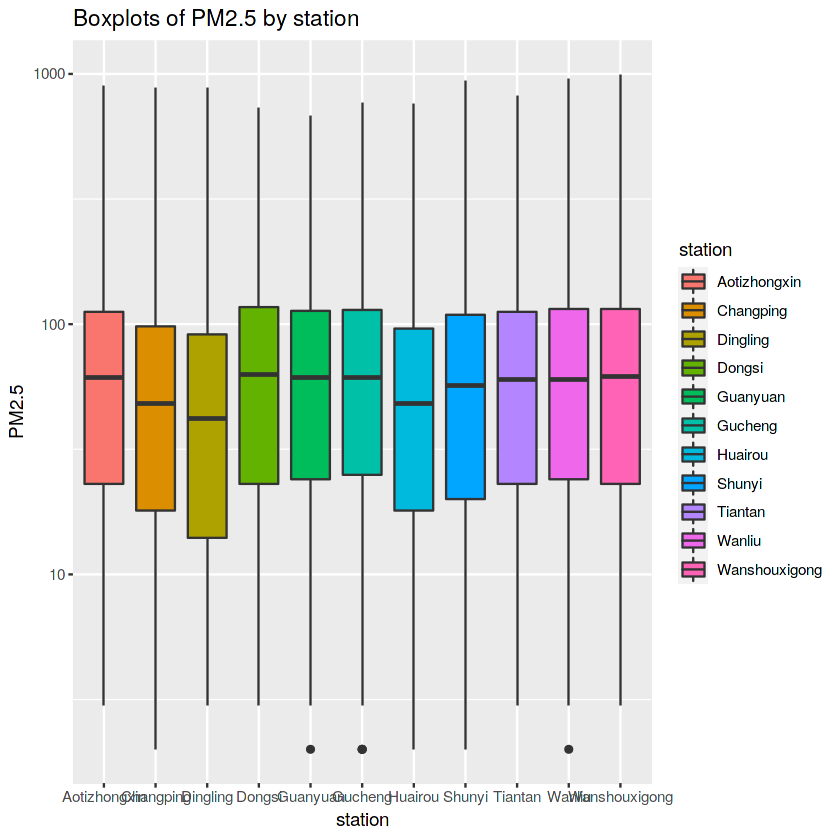

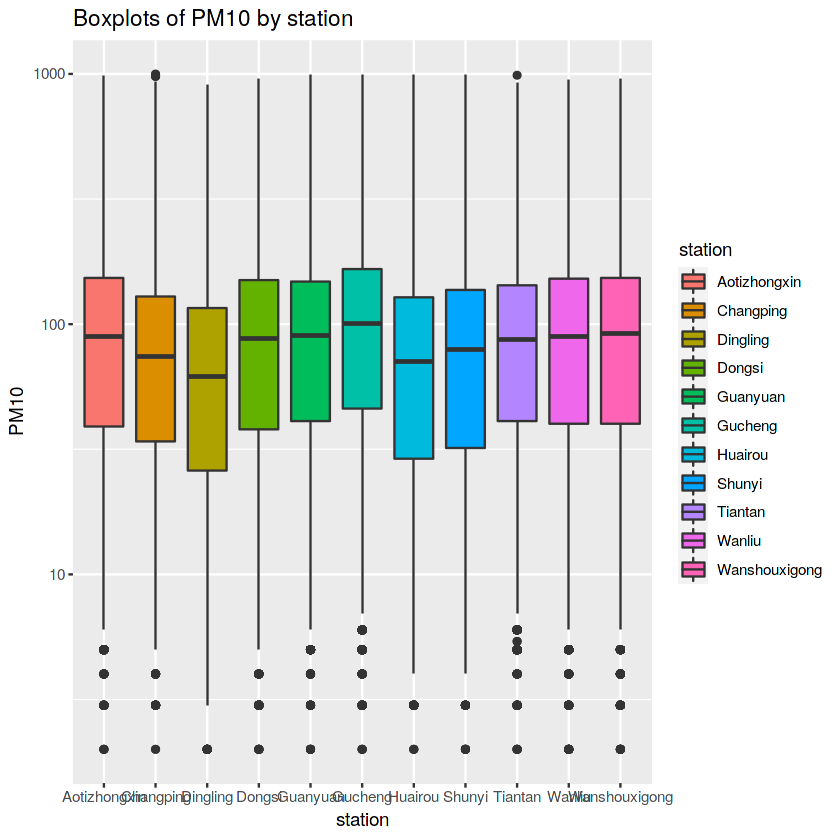

In [17]:
ggplot(pr, aes(x = pr$station, y = pr$`PM2.5`)) +
  geom_boxplot(aes(fill = station)) + scale_y_log10() +
  xlab("station") + 
  ylab("PM2.5") +
  ggtitle("Boxplots of PM2.5 by station") 
ggplot(pr, aes(x = pr$station, y = pr$PM10)) +
  geom_boxplot(aes(fill = station)) + scale_y_log10() +
  xlab("station") + 
  ylab("PM10") +
  ggtitle("Boxplots of PM10 by station") 



List of 2
 $ axis.title  :List of 11
  ..$ family       : NULL
  ..$ face         : NULL
  ..$ colour       : NULL
  ..$ size         : NULL
  ..$ hjust        : NULL
  ..$ vjust        : NULL
  ..$ angle        : NULL
  ..$ lineheight   : NULL
  ..$ margin       : NULL
  ..$ debug        : NULL
  ..$ inherit.blank: logi FALSE
  ..- attr(*, "class")= chr [1:2] "element_text" "element"
 $ axis.title.x:List of 11
  ..$ family       : NULL
  ..$ face         : NULL
  ..$ colour       : NULL
  ..$ size         : NULL
  ..$ hjust        : NULL
  ..$ vjust        : NULL
  ..$ angle        : NULL
  ..$ lineheight   : NULL
  ..$ margin       : NULL
  ..$ debug        : NULL
  ..$ inherit.blank: logi FALSE
  ..- attr(*, "class")= chr [1:2] "element_text" "element"
 - attr(*, "class")= chr [1:2] "theme" "gg"
 - attr(*, "complete")= logi FALSE
 - attr(*, "validate")= logi TRUE

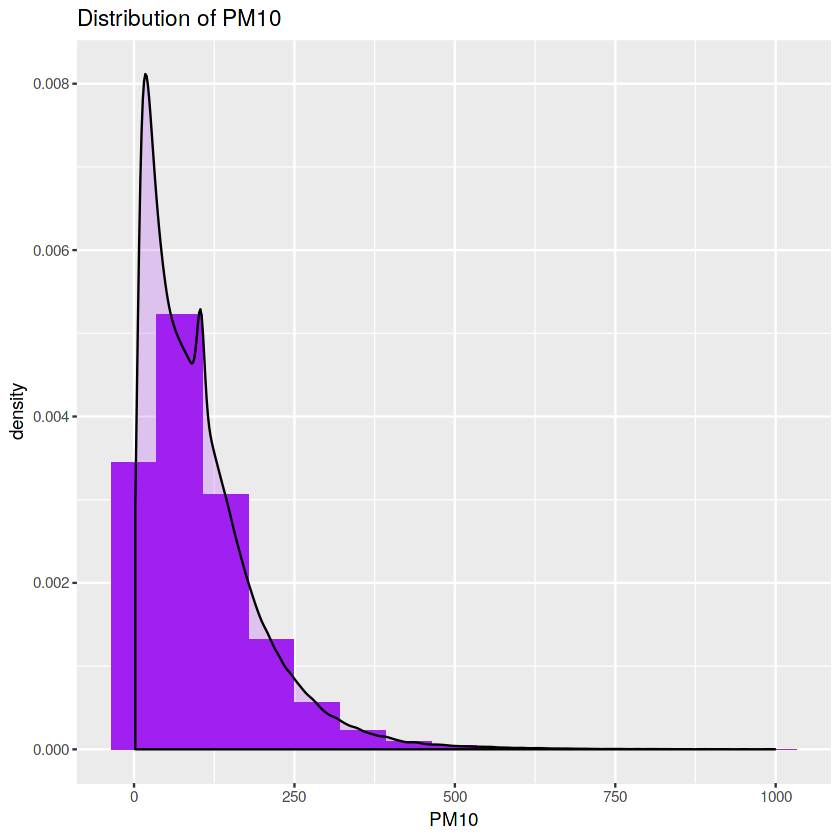

List of 2
 $ axis.title  :List of 11
  ..$ family       : NULL
  ..$ face         : NULL
  ..$ colour       : NULL
  ..$ size         : NULL
  ..$ hjust        : NULL
  ..$ vjust        : NULL
  ..$ angle        : NULL
  ..$ lineheight   : NULL
  ..$ margin       : NULL
  ..$ debug        : NULL
  ..$ inherit.blank: logi FALSE
  ..- attr(*, "class")= chr [1:2] "element_text" "element"
 $ axis.title.x:List of 11
  ..$ family       : NULL
  ..$ face         : NULL
  ..$ colour       : NULL
  ..$ size         : NULL
  ..$ hjust        : NULL
  ..$ vjust        : NULL
  ..$ angle        : NULL
  ..$ lineheight   : NULL
  ..$ margin       : NULL
  ..$ debug        : NULL
  ..$ inherit.blank: logi FALSE
  ..- attr(*, "class")= chr [1:2] "element_text" "element"
 - attr(*, "class")= chr [1:2] "theme" "gg"
 - attr(*, "complete")= logi FALSE
 - attr(*, "validate")= logi TRUE

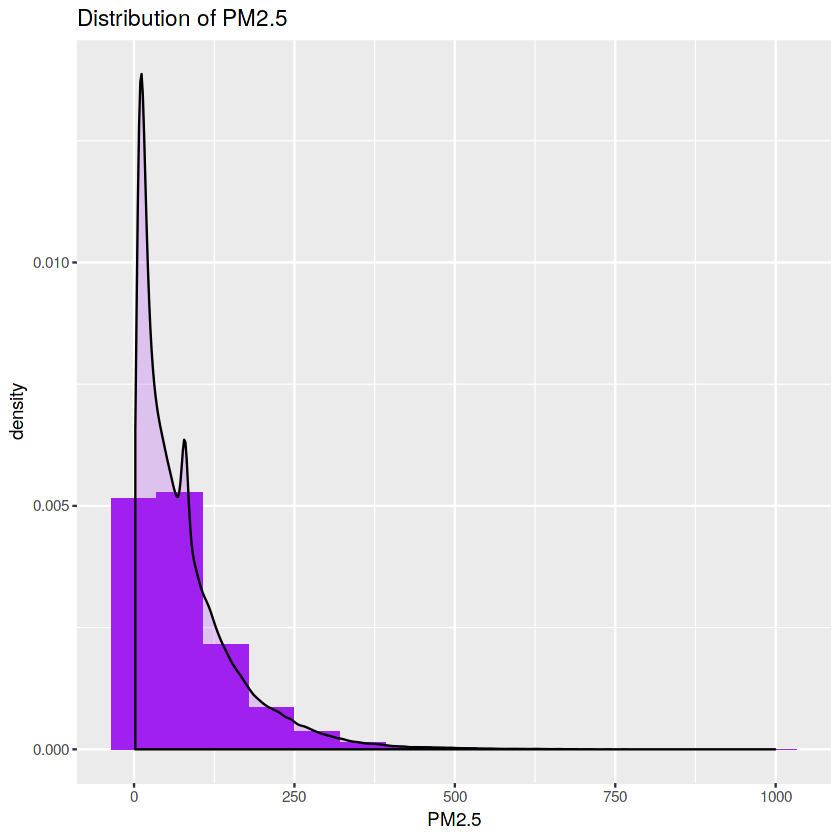

In [18]:
ggplot(pr, aes(PM10)) +
  geom_histogram(bins = 15, aes(y = ..density..), fill = "purple") + 
  geom_density(alpha = 0.2, fill = "purple") +
  ggtitle("Distribution of PM10")
  theme(axis.title = element_text(), axis.title.x = element_text()) 

ggplot(pr, aes(PM2.5)) +
  geom_histogram(bins = 15, aes(y = ..density..), fill = "purple") + 
  geom_density(alpha = 0.2, fill = "purple") +
  ggtitle("Distribution of PM2.5")
  theme(axis.title = element_text(), axis.title.x = element_text())

Warning message:
“Use of `pr$year` is discouraged. Use `year` instead.”
Warning message:
“Use of `pr$PM2.5` is discouraged. Use `PM2.5` instead.”
Warning message:
“Use of `pr$year` is discouraged. Use `year` instead.”
Warning message:
“Use of `pr$PM2.5` is discouraged. Use `PM2.5` instead.”
`geom_smooth()` using formula 'y ~ x'



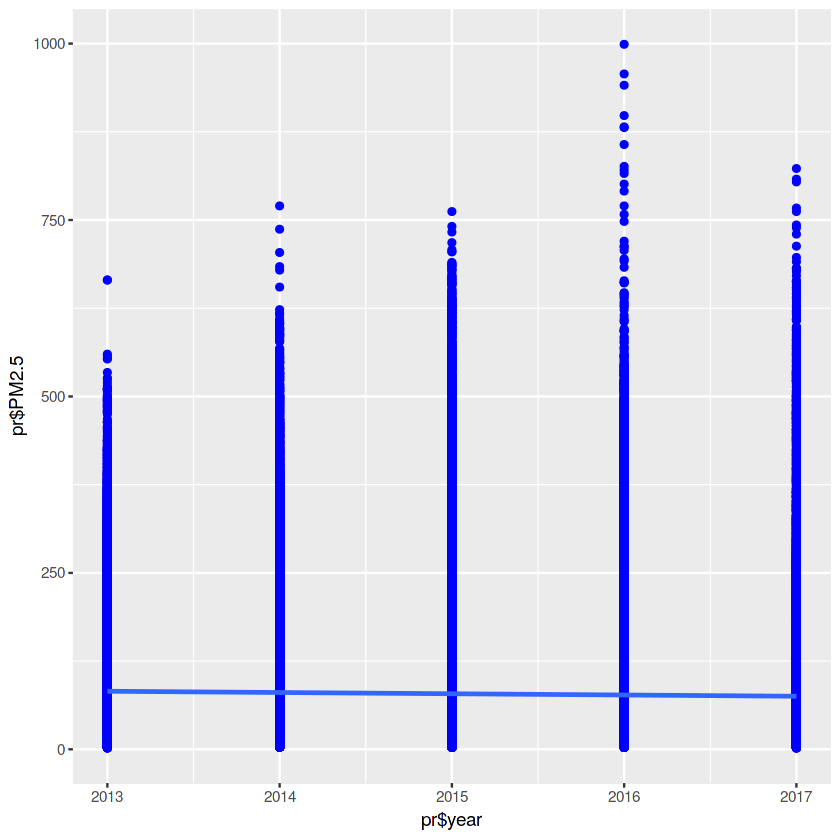

In [19]:

m_fit <- lm(PM2.5 ~ year, data=pr)
adf <- data.frame(mpg_pred = predict(m_fit, pr), PM = pr$`PM2.5`)

(time_plot2 <- ggplot(pr, aes(x = pr$year, y = pr$PM2.5)) +
    geom_point(color = 'blue') + geom_smooth(method = "lm", se = FALSE))
